# CREDIT CARD FRAUD PREDICTION USING LOGISTICS REGRESSION MODEL
Digital payments are evolving, but so are cyber criminalities. According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistics that shows fraud is still very common both for card-present and card-not present type of payments despite available methods of fraud prevention. In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging and hence, the need for adoption of machine learning approach. In this work, I will build a mchine learning (logistic regression) model to predict fraudulent transaction by combining various characteristics of transactions.

## Dataset
The dataset used in this project was downloaded from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud.
 - Feature Explanation:
   - distancefromhome - the distance from account owner's home to where the transaction happened.
   - distancefromlast_transaction - the distance from last transaction happened.
   - ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.
   - repeat_retailer - Is the transaction happened from same retailer.
   - used_chip - Is the transaction through chip (credit card).
   - usedpinnumber - DId the transaction happened by using PIN number.
   - online_order - Was the transaction for an online order.
   - fraud - Is the transaction fraudulent.
## Model Development
One of the major challenges of building fraud detection model is the unbalanced nature of fraud dataset. Naturally, fraud-free transction are much more common than fraudulent transactions hence fraud detection datasets are expected to be unbalanced. In the case of this dataset, only 8.74% of the transactions are fraudulent. Most ML model are known to perform poorly with unbalanced data. In this work, I Will fit logistic regression model to the dataset, assess the performance, then I will go ahead to apply some techniques for addressing the rare class problem to see if the model performance will improve.

## LIBRARY AND DATA IMPORT

In [113]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [114]:
df = pd.read_csv('card_transdata.csv')

## EXPLORATORY DATA ANALYSIS

### Observe below that out of 1 million transactions in the datasate, only 87,403 (8.74%) transactions are fraudulent

In [115]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [117]:
df[['fraud']].value_counts()

fraud
0.0      912597
1.0       87403
dtype: int64

In [118]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [119]:
df_fraud = df.loc[df['fraud']==1]
df_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [120]:
#a quick look at mean value of the features for fraudulent and non-fraudulent transactions
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


<AxesSubplot: xlabel='fraud', ylabel='count'>

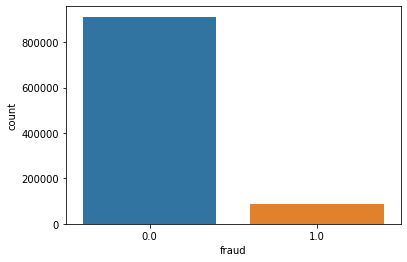

In [121]:
#visualizing the count plot and the unbalanced nature of the dataset
sns.countplot(x = 'fraud', data = df)

In [122]:
#correlation of each of the variables with fraud
df.corr()['fraud'].sort_values()

used_pin_number                  -0.100293
used_chip                        -0.060975
repeat_retailer                  -0.001357
distance_from_last_transaction    0.091917
distance_from_home                0.187571
online_order                      0.191973
ratio_to_median_purchase_price    0.462305
fraud                             1.000000
Name: fraud, dtype: float64

<AxesSubplot: >

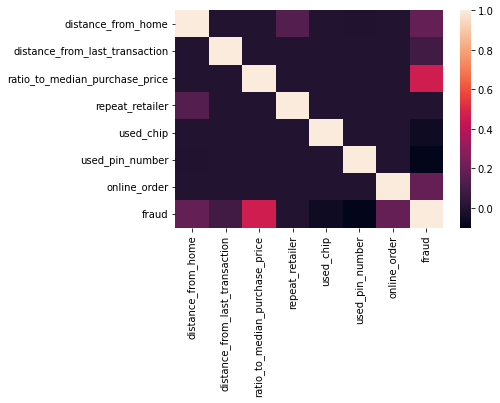

In [123]:
sns.heatmap(df.corr())

<AxesSubplot: >

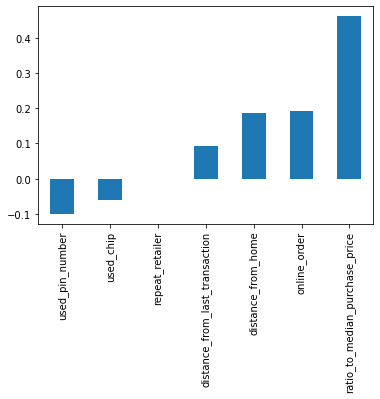

In [124]:
#visualize the correlation
df.corr()['fraud'][:-1].sort_values().plot(kind='bar')

### We further explore the variables with significant correlations with fraud

<AxesSubplot: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

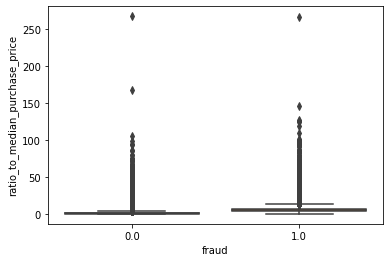

In [125]:
#ration to median purchase price higher for fraudulent transactions
sns.boxplot(x='fraud',y='ratio_to_median_purchase_price',data=df)

<AxesSubplot: xlabel='fraud', ylabel='count'>

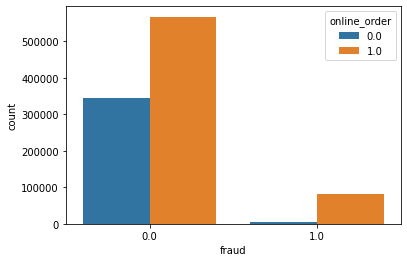

In [126]:
#online orders are more likely to be fraudulent
sns.countplot(x='fraud',hue='online_order',data=df)

<AxesSubplot: xlabel='fraud', ylabel='count'>

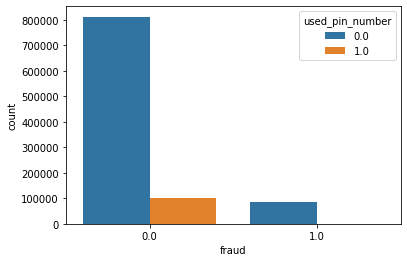

In [127]:
#transactions are less likely to be fraudulent when pin numbers are used
sns.countplot(x='fraud',hue='used_pin_number',data=df)

<AxesSubplot: xlabel='fraud', ylabel='distance_from_home'>

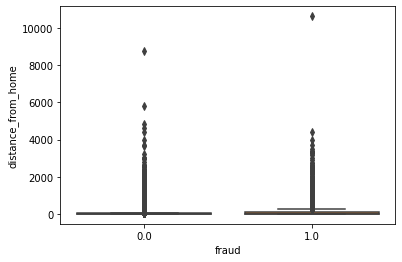

In [128]:
sns.boxplot(x='fraud',y='distance_from_home',data=df)

## DATA PREPROCESSING AND MODEL TRAINING

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 43)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_transformed = scaler.fit_transform(X_train)
columns = X.columns
X_trained_transformed = pd.DataFrame(X_trained_transformed, columns = columns)
X_trained_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.211056,-0.094865,1.992367,0.366168,-0.735005,-0.334095,0.732968
1,-0.381153,0.930823,1.836468,0.366168,1.360535,-0.334095,0.732968
2,-0.262578,-0.205536,-0.545305,0.366168,-0.735005,-0.334095,0.732968
3,-0.204920,-0.151519,0.142076,0.366168,-0.735005,-0.334095,-1.364316
4,-0.234033,-0.227503,-0.546827,0.366168,-0.735005,-0.334095,0.732968


In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logmodel = LogisticRegression(max_iter = 200)

In [135]:
logmodel.fit(X_trained_transformed,y_train)

LogisticRegression(max_iter=200)

## PREDICTION AND MODEL ASSESSMENT

In [136]:
X_test_transformed = scaler.transform(X_test)
columns = X.columns
X_test_transformed = pd.DataFrame(X_test_transformed, columns = columns)
X_test_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.559393,-0.222628,1.788491,0.366168,1.360535,-0.334095,0.732968
1,-0.322869,-0.216238,0.103321,0.366168,-0.735005,-0.334095,0.732968
2,-0.341000,-0.223533,0.309806,0.366168,1.360535,-0.334095,0.732968
3,-0.347664,-0.118146,0.771869,0.366168,-0.735005,-0.334095,0.732968
4,-0.388108,0.205750,-0.130159,-2.730988,1.360535,-0.334095,0.732968


In [137]:
predictions = logmodel.predict(X_test_transformed)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [139]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273810
         1.0       0.89      0.61      0.72     26190

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [140]:
confusion_matrix(y_test, predictions)

array([[271788,   2022],
       [ 10227,  15963]], dtype=int64)

In [141]:
accuracy_score(y_test, predictions)

0.95917

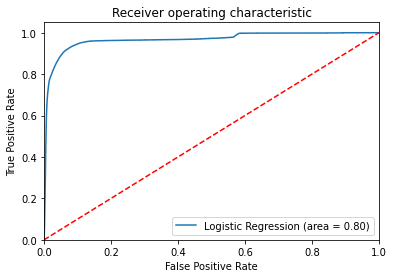

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_transformed))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_transformed)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# As seen above, the overall accuracy of the model which is 0.95917 appears good but cannot be used to assess this model because of the unbalanced nature of the dataset. The precision and recall, alongside the accuracy combined give the true picture of the performance of the model however, the precision score of 0.61 and recall of 0.72 indicate the the model is not very good in correctly classifying the rare class as it does for the other class. In view of this,  I shall adopt oversampling to improve the model performance.

In [143]:
#reimport the raw dataset
df = pd.read_csv('card_transdata.csv')

In [144]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## OVERSAMPLING

In [145]:
#I define the dependent and independent variables
X = df.drop(['fraud'],axis = 1)
y = df['fraud']

In [146]:
#oversampling using the imbalanced-learn python library
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [147]:
#re-merge for EDA
df_over = pd.concat([X_over,y_over],axis=1)

In [148]:
df_over.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## EXPLORATORY DATA ANALYSIS

<AxesSubplot: xlabel='fraud', ylabel='count'>

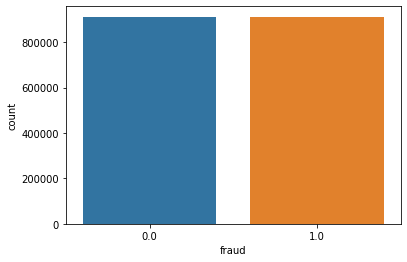

In [149]:
#classes now balanced
sns.countplot(x='fraud',data=df_over)

In [150]:
#a quick look at mean value of the features for fraudulent and non-fraudulent transactions
df_over.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.226110,12.785351,6.004067,0.879785,0.256680,0.003063,0.946225


In [151]:
df_over.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1825194.0,44.529543,104.019007,0.004874,4.142186,11.754601,37.687376,10632.723672
distance_from_last_transaction,1825194.0,8.543371,37.784726,0.000118,0.310561,1.065293,3.829804,11851.104565
ratio_to_median_purchase_price,1825194.0,3.713854,4.749318,0.004399,0.690092,2.011215,5.235840,267.802942
repeat_retailer,1825194.0,0.880728,0.324108,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1825194.0,0.308041,0.461684,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1825194.0,0.056504,0.230892,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1825194.0,0.784225,0.411359,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,1825194.0,0.500000,0.500000,0.000000,0.000000,0.500000,1.000000,1.000000


In [152]:
#correlation of each of the variables with fraud
df_over.corr()['fraud'].sort_values()

used_pin_number                  -0.231454
used_chip                        -0.111247
repeat_retailer                  -0.002911
distance_from_last_transaction    0.112267
distance_from_home                0.208583
online_order                      0.393816
ratio_to_median_purchase_price    0.482219
fraud                             1.000000
Name: fraud, dtype: float64

<AxesSubplot: >

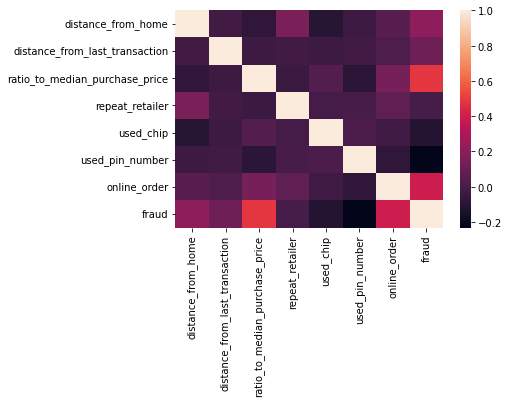

In [153]:
sns.heatmap(df_over.corr())

<AxesSubplot: >

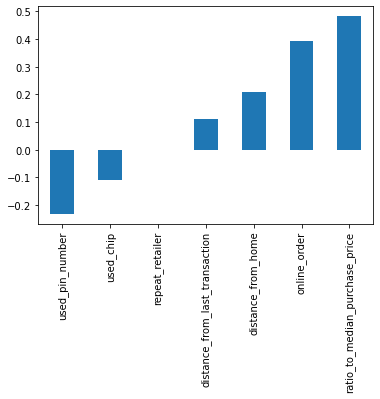

In [154]:
df_over.corr()['fraud'][:-1].sort_values().plot(kind='bar')

### We further explore the variables with significant correlations with fraud

<AxesSubplot: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

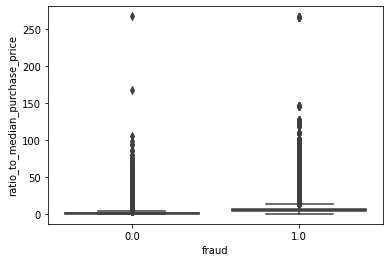

In [155]:
#ration to median purchase price higher for fraudulent transactions
sns.boxplot(x='fraud',y='ratio_to_median_purchase_price',data=df_over)

<AxesSubplot: xlabel='fraud', ylabel='count'>

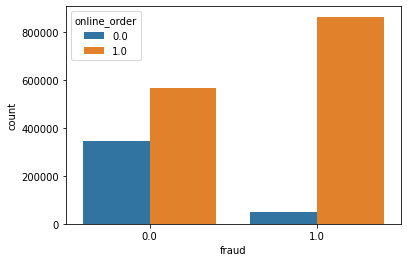

In [156]:
#online orders are more likely to be fraudulent
sns.countplot(x='fraud',hue='online_order',data=df_over)

<AxesSubplot: xlabel='fraud', ylabel='count'>

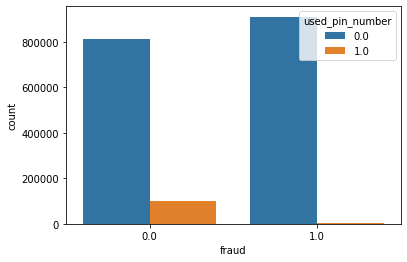

In [157]:
#transactions are less likely to be fraudulent when pin numbers are used
sns.countplot(x='fraud',hue='used_pin_number',data=df_over)

<AxesSubplot: xlabel='fraud', ylabel='distance_from_home'>

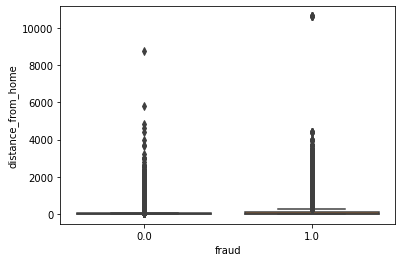

In [158]:
sns.boxplot(x='fraud',y='distance_from_home',data=df_over)

## DATA PREPARATION MODEL TRAINING AND ASSESSMENT

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state = 43)

In [160]:
#as part of preprocessing, I shall transform the independent variable to make it appropriate to be passed into logistic regression model
from sklearn.preprocessing import StandardScaler
columns = X_over.columns
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns = columns)
X_train_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.268167,-0.181586,2.053853,0.368009,1.499015,-0.244671,0.525001
1,-0.346399,-0.227679,-0.134354,0.368009,-0.667105,4.087127,0.525001
2,-0.377079,-0.201560,-0.198613,0.368009,-0.667105,-0.244671,0.525001
3,-0.299126,-0.180417,-0.502093,0.368009,-0.667105,-0.244671,0.525001
4,-0.416190,-0.093649,-0.609292,-2.717328,-0.667105,-0.244671,0.525001


In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
logmodel = LogisticRegression(max_iter = 200)

In [163]:
logmodel.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=200)

In [164]:
X_test_transformed = scaler.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = columns)
X_test_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.731859,-0.098570,-0.629725,0.368009,-0.667105,-0.244671,0.525001
1,-0.358836,0.079219,-0.499421,0.368009,-0.667105,-0.244671,0.525001
2,-0.413249,-0.041578,-0.475285,-2.717328,1.499015,-0.244671,0.525001
3,-0.385277,-0.126289,1.313159,0.368009,1.499015,-0.244671,0.525001
4,0.600462,-0.216363,0.006923,0.368009,-0.667105,-0.244671,0.525001


In [165]:
predictions = logmodel.predict(X_test_transformed)

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [167]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    273968
         1.0       0.93      0.95      0.94    273591

    accuracy                           0.94    547559
   macro avg       0.94      0.94      0.94    547559
weighted avg       0.94      0.94      0.94    547559



In [168]:
confusion_matrix(y_test, predictions)

array([[255487,  18481],
       [ 13649, 259942]], dtype=int64)

In [169]:
accuracy_score(y_test, predictions)

0.9413213918500107

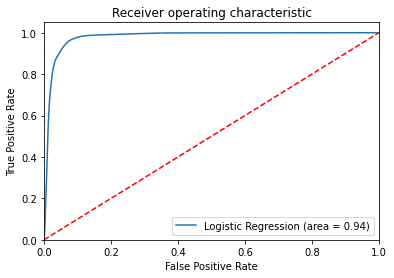

In [170]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_transformed))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_transformed)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## PREDICT A SINGLE CLASS

In [171]:
#predict a fraudulent transaction
df_1fraud=df[df['fraud']==1].head(1)
df_1fraud=df_1fraud.drop('fraud',axis=1)
df_1fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0


In [172]:
df_1fraud = scaler.transform(df_1fraud)

In [173]:
df_1fraud

array([[-0.40851561,  1.29597531,  0.55667687,  0.36800856, -0.6671046 ,
        -0.24467067,  0.52500085]])

In [174]:
df_1fraud = pd.DataFrame(df_1fraud, columns = columns)

In [175]:
#correctly predicted as fraudulent
logmodel.predict(df_1fraud)

array([1.])

#### As can now be seen above, the precision and recall have improved from 0.61 and 0.72 to 0.95 and 0.94 respectively. Although, the overall acuracy reduced from 0.95917 to 0.941, the overall status of this model is much better than the earlier model for unbalanced dataset hence, this model is adopted for credit card fraud prevention.

## SAVE THE FINAL MODEL AND SCALER

In [176]:
import joblib
#save model
joblib.dump(logmodel, 'agada_credit_card_fraud_prediction.sav')
#save the scaler for transforming new records
joblib.dump(scaler,'agada_credit_card_fraud_prediction_scaler.pkl')

['agada_credit_card_fraud_prediction_scaler.pkl']

## CODE FOR DEPLOYMENT

In [177]:
model = joblib.load('agada_credit_card_fraud_prediction.sav')
scaler =joblib.load('agada_credit_card_fraud_prediction_scaler.pkl')

In [178]:
def return_prediction(model,scaler,sample_json):
    
    ft_a = sample_json['distance_from_home']
    ft_b = sample_json['distance_from_last_transaction']
    ft_c = sample_json['ratio_to_median_purchase_price']
    ft_d = sample_json['repeat_retailer']
    ft_e = sample_json['used_chip']
    ft_f = sample_json['used_pin_number']
    ft_g = sample_json['online_order']
    
    columns = ['distance_from_home',
                'distance_from_last_transaction',
                'ratio_to_median_purchase_price',
                'repeat_retailer',
                'used_chip',
                'used_pin_number',
                'online_order']
    
    transaction = [[ft_a,ft_b,ft_c,ft_d,ft_e,ft_f,ft_g]]
    
    transaction = pd.DataFrame(transaction, columns = columns)
    
    transaction = scaler.transform(transaction)
    
    transaction = pd.DataFrame(transaction, columns = columns)
    
    classes = np.array(['not fraudulent', 'fraudulent'])
    
    class_ind = model.predict(transaction)

    class_ind = class_ind[0]
    
    return classes[int(class_ind)]   

## WE PREDICT FRAUDULENT AND NON FRAUDULENT CLASSES USING THE FUNCTION

In [179]:
# this is a fraudulent transaction
df_fraud2 = df[df['fraud']==1].tail(1)
df_fraud2

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999949,15.724799,1.875906,11.009366,1.0,1.0,0.0,1.0,1.0


In [180]:
transaction_example = {'distance_from_home':15.724799,
                        'distance_from_last_transaction':1.875906,
                        'ratio_to_median_purchase_price':11.009366,
                        'repeat_retailer':1.0,
                        'used_chip':1.0,
                        'used_pin_number':0.0,
                        'online_order':1.0
                       }

In [181]:
# the transaction is correctly predicted as fraudulent
return_prediction(model,scaler,transaction_example)

'fraudulent'

In [182]:
#this transaction is not fraudulent
df_not_fraud = df.head(1)
df_not_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.31114,1.94594,1.0,1.0,0.0,0.0,0.0


In [183]:
#predict a non fraudulent transaction
df.head(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.31114,1.94594,1.0,1.0,0.0,0.0,0.0


In [184]:
transaction_example2 = {'distance_from_home':57.877857,
                        'distance_from_last_transaction':0.31114,
                        'ratio_to_median_purchase_price':1.94594,
                        'repeat_retailer':1.0,
                        'used_chip':1.0,
                        'used_pin_number':0.0,
                        'online_order':0.0
                       }

In [185]:
#correct prediction
return_prediction(model,scaler,transaction_example2)

'not fraudulent'